<a href="https://colab.research.google.com/github/faranak5171/Deep-Learning-projects/blob/master/Cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import torch
from torchvision import datasets, transforms, utils
from torch.utils.data import DataLoader, SubsetRandomSampler
from torch import nn, optim
import torch.nn.functional as F

import warnings
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset = datasets.CIFAR10('data', download=True, train=True, transform=transform)
testset = datasets.CIFAR10('data', download=True, train=False, transform=transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [3]:
val_size = 0.2
num_indices = len(trainset)
indices = list(range(num_indices))
np.random.shuffle(indices)
val_index = int(val_size*num_indices)
train_idx, val_idx = indices[val_index:], indices[:val_index]

train_sampler = SubsetRandomSampler(train_idx)
val_sampler = SubsetRandomSampler(val_idx)

trainloader = DataLoader(trainset, batch_size=64, sampler=train_sampler)
valloader = DataLoader(trainset, batch_size=64, sampler=val_sampler)
testloader = DataLoader(testset, batch_size=64)

In [4]:
# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck']

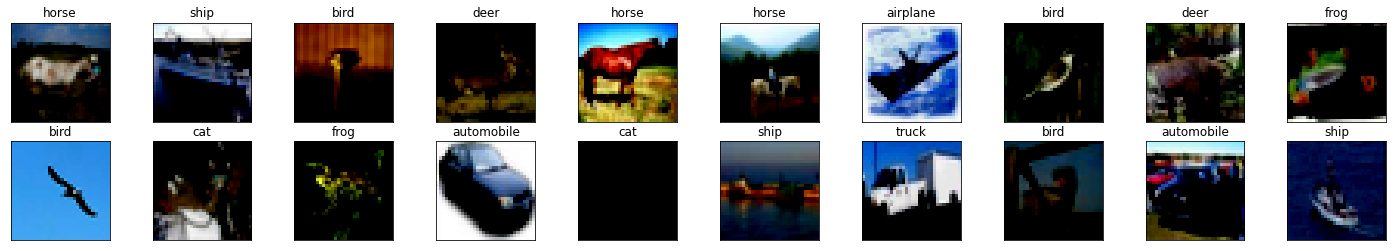

In [14]:
images, labels = next(iter(trainloader))
fig = plt.figure(figsize=(25,4))
for idx in range(20):
  ax = fig.add_subplot(2,10,idx+1, xticks=[], yticks=[])
  plt.imshow(utils.make_grid(images[idx]).permute(1,2,0))
  ax.set_title(classes[labels[idx]])
warnings.filterwarnings("ignore", category=FutureWarning)

In [81]:
class network(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
    self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
    self.conv3 = nn.Conv2d(32, 64, 3, padding=1)

    # Max pooling layer to reduce or half the size of input(width, height)
    self.pool = nn.MaxPool2d(2,2)
    # Fully connected layers
    self.fc1 = nn.Linear(1024, 500)
    self.fc2 = nn.Linear(500,10)
    self.dropout = nn.Dropout(0.25)

  def forward(self,x):
    # Input tensor in the shape of (3,32,32)
    x = self.pool(F.relu(self.conv1(x)))
    #print("output shape of conv1:",x.shape)
    x = self.pool(F.relu(self.conv2(x)))
    #print("output shape of conv2:",x.shape)
    x = self.pool(F.relu(self.conv3(x)))
    #print("output shape of conv3:",x.shape)

    # Flatten input
    x = x.view(-1,64*4*4)
    x = self.dropout(x)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = self.fc2(x)
    print(x.shape)
    return x

In [88]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Input shape:{images.shape}")
model = network()
model.to(device)

Input shape:torch.Size([64, 3, 32, 32])


network(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
epochs = 10
running_loss = 0

for epoch in range(epochs):
  model.train()

  for inputs,labels in trainloader:
    inputs, labels = inputs.to(device), labels.to(device)
    optimizer.zero_grad()
    output = model.forward(inputs)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()*inputs.size(0)
  
  print(f"Epoch")